<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="../images/QWorld.png"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://www.classiq.io/" target="_blank">
            <img src="../images/classiq-logo.svg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->    
    <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
         prepared by Alvaro Rafael Gomez
    </td>     
</tr></table>

$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $

<h2 align="left" > State preparation: Gaussian mixture </h2>

A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions.

This example generates and executes a circuit whose output state probabilities correspond to a Gaussian mixture. 

GaussianMixture includes a list of Gaussian functions to describe the total distribution, and the num_qubits field determines the sampling. 

Each Gaussian function is described by the mean "mu" and standard deviation "sigma".

Please read the Classiq documentation in 
https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/state-preparation/state-preparation/
to learn how the Classiq engine calculates the underlying PMF (Probability mass function).


Run the following cell. Then copy the generated code in the Classiq Synthesis Custom interface.

You can manually copy the generated model in the Synthetize Custom screen or uncomment the last line to use the show command to start automatically the platform in a new window.

Then you can observe the generated circuit and run Execute and Run to observe the output.

In [5]:
from classiq import Model, synthesize, show
from classiq.model import Constraints
from classiq.builtin_functions import StatePreparation
from classiq.builtin_functions.state_preparation import (
    GaussianMixture,
    GaussianMoments,
)
from classiq import execute

params = StatePreparation(
    probabilities=GaussianMixture(
        gaussian_moment_list=(
            GaussianMoments(mu=1, sigma=1),
            GaussianMoments(mu=3, sigma=1),
            GaussianMoments(mu=-3, sigma=1),
        ),
        num_qubits=8,
    ),
    error_metric={"L2": {"upper_bound": 0.023}},
)

constraints = Constraints(max_depth=91)
model = Model(constraints=constraints)
model.StatePreparation(params)
model.sample()

print(model.get_model())

quantum_program = synthesize(model.get_model())

results = execute(quantum_program).result()

#show(quantum_program)

{
  "types": [],
  "constants": [],
  "classical_execution_code": "\nresult = sample({})\nsave({'result': result})\n",
  "execution_preferences": {
    "amplitude_amplification": {
      "iterations": []
    },
    "random_seed": 4114813304,
    "backend_preferences": {
      "backend_service_provider": "Classiq",
      "backend_name": "aer_simulator"
    }
  },
  "kind": "synthesis",
  "functions": [
    {
      "name": "main",
      "port_declarations": {},
      "parameters": [],
      "input_ports_wiring": {},
      "output_ports_wiring": {},
      "body": [
        {
          "function": "StatePreparation",
          "params": {},
          "function_params": {
            "probabilities": {
              "gaussian_moment_list": [
                {
                  "mu": 1.0,
                  "sigma": 1.0
                },
                {
                  "mu": 3.0,
                  "sigma": 1.0
                },
                {
                  "mu": -3.0,
           

### Generated circuit


<a align="left"><img src="../images/State_preparation_gaussianmix_1.png" align="left" width="800" ></a>




### Obtained output


<a align="left"><img src="../images/State_preparation_gaussianmix_2.png" align="left" width="800" ></a>



### Plot in the SDK

You can use the following code, from Classiq documentation, to obtain the resulting plot in the SDK. 

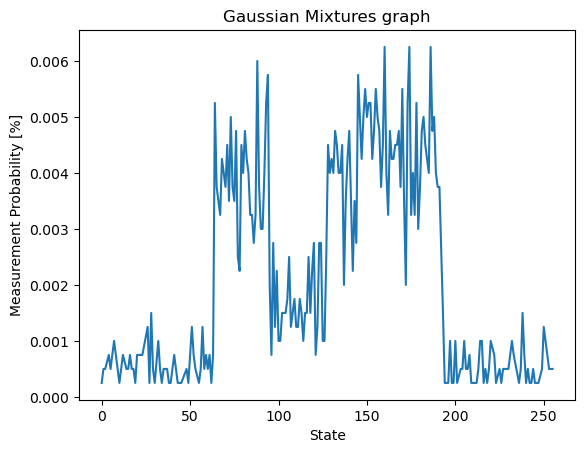

In [6]:
from classiq.execution import ExecutionDetails
from matplotlib import pyplot as plt

counts = results[0].value.counts_by_qubit_order(lsb_right=True)
sorted_counts = dict(sorted(counts.items()))

bit_strings, counts = sorted_counts.keys(), sorted_counts.values()
plt.title("Gaussian Mixtures graph")
plt.xlabel("State")
plt.ylabel("Measurement Probability [%]")
plt.plot(
    [int(bit_str, 2) for bit_str in bit_strings], [count / 4000 for count in counts]
)
plt.show()
